In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt 

In [8]:
image = cv2.imread("/home/sachin269/Desktop/INV_KINEMATICS/sample_image.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# k = cv2.waitKey(0) & 0xFF
# if k == 27:
#     cv2.destroyAllWindows()


# face detection

face_cascade = cv2.CascadeClassifier("/home/sachin269/Desktop/INV_KINEMATICS/haarcascade_frontalface_default.xml")

faces = face_cascade.detectMultiScale(gray, scaleFactor = 1.3, minNeighbors = 3, minSize = (30,30))

for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)

status = cv2.imwrite('faces_detected.jpg', image)

# cap = cv2.VideoCapture(0)
# i = 0
# while True:
#     _, img = cap.read()
#     gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#     faces = face_cascade.detectMultiScale(gray, 1.1, 4)
#     for (x, y, w, h) in faces:
#         cv2.rectangle(img, (x, y ), (x+w, y+h), (255, 0, 0), 2)
#     cv2.imshow('image', img)
#     cv2.imwrite('/home/sachin269/Desktop/INV_KINEMATICS/images_folder/Frame'+str(i)+'.jpg', img)
#     i+=1
#     k = cv2.waitKey(1000) & 0xFF
#     if k==27:
#         break
# cap.release()

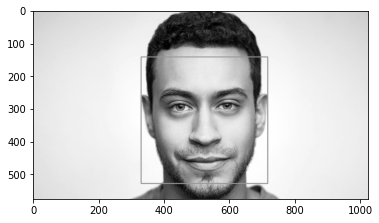

In [9]:
face_img = cv2.imread("./faces_detected.jpg")
im_gray = cv2.cvtColor(face_img, cv2.COLOR_BGR2GRAY)
plt.imshow(im_gray, cmap='gray')
plt.show()
#k = cv2.waitKey(0) & 0xFF
# if k == 27:
#     cv2.destroyAllWindows()

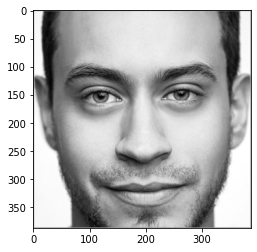

In [12]:
crop_img = im_gray[y:y+h, x:x+w]
plt.imshow(crop_img, cmap='gray')
plt.show()

In [ ]:
from skimage.io import imread, imshow
from skimage.color import rgb2hsv, rgb2gray, rgb2yuv
from skimage import color, exposure, transform
from skimage.exposure import equalize_hist

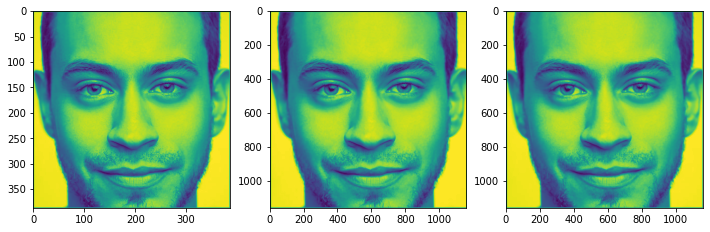

In [20]:
sr = cv2.dnn_superres.DnnSuperResImpl_create()

path = "FSRCNN_x3.pb"

sr.readModel(path)
sr.setModel("fsrcnn", 3)

result = sr.upsample(crop_img)

resized = cv2.resize(crop_img, dsize = None, fx = 3, fy = 3)
plt.figure(figsize=(12,8))
plt.subplot(1,3,1)
# Original image
plt.imshow(crop_img[:,:])
plt.subplot(1,3,2)
# SR upscaled
plt.imshow(result[:,:])
plt.subplot(1,3,3)
# OpenCV upscaled
plt.imshow(resized[:,:])
plt.show()


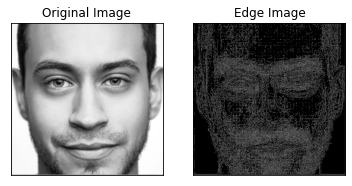

In [24]:
edges = cv2.Canny(resized, 10, 10, None, 3)
plt.subplot(121),plt.imshow(resized,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

In [25]:
from skimage.transform import probabilistic_hough_line
edges = cv2.rotate(edges, cv2.ROTATE_180)
lines = probabilistic_hough_line(edges, threshold=10, line_length=18, line_gap=6)
# lines
# type(lines)
# lines[0][0][0]

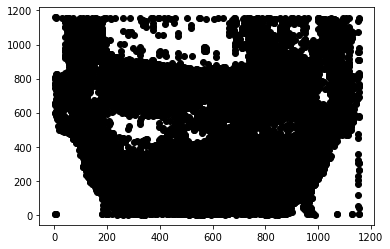

In [26]:
 # Show results
#cv2.imshow("Source", im_gray)
#cv2.imshow("Detected Lines (in red) - Standard Hough Line Transform", cdst)
#cv2.imshow("Detected Lines (in red) - Probabilistic Line Transform", cdstP)
x = []
y = []
for i in range(len(lines)):
     x.append(lines[i][0][0])
     x.append(lines[i][1][0])
     y.append(lines[i][0][1])
     y.append(lines[i][1][1])
     plt.scatter(x, y, color = 'black')
     x = []
     y = []

In [7]:
!pip install dlib

  Using cached dlib-19.23.1.tar.gz (7.4 MB)
  Preparing metadata (setup.py) ... done
  Created wheel for dlib: filename=dlib-19.23.1-cp38-cp38-linux_x86_64.whl size=4632093 sha256=900a4a9dcfbd6c08dd1733ab5d45eb31bcb6aa8cb881e52cf845541ea1a1be1b
  Stored in directory: /home/sachin269/.cache/pip/wheels/3a/ac/73/b4a0ecae4672035801b9d8a9e83eb31049bd438e7ad6ce4852
Successfully built dlib


In [8]:
import dlib
import numpy as np
from skimage import io

predictor_path = "shape_predictor_68_face_landmarks.dat"
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(predictor_path)
img = io.imread("sample_image.jpg")
dets = detector(img)

#output face landmark points inside retangle
#shape is points datatype
#http://dlib.net/python/#dlib.point
for k, d in enumerate(dets):
    shape = predictor(img, d)

vec = np.empty([68, 2], dtype = int)
for b in range(68):
    vec[b][0] = shape.part(b).x
    vec[b][1] = shape.part(b).y

print(vec)

[[360 289]
 [363 336]
 [371 382]
 [383 428]
 [401 470]
 [429 506]
 [459 538]
 [494 564]
 [538 569]
 [581 560]
 [614 529]
 [641 492]
 [664 453]
 [676 411]
 [682 366]
 [685 321]
 [684 277]
 [384 267]
 [403 243]
 [435 236]
 [467 242]
 [499 254]
 [545 254]
 [574 241]
 [606 234]
 [637 239]
 [658 260]
 [523 288]
 [524 322]
 [526 356]
 [527 389]
 [492 404]
 [509 410]
 [528 415]
 [547 408]
 [564 401]
 [422 296]
 [439 286]
 [462 286]
 [483 299]
 [461 304]
 [438 304]
 [564 296]
 [582 283]
 [604 282]
 [623 290]
 [607 299]
 [585 300]
 [461 456]
 [486 452]
 [511 447]
 [529 451]
 [547 445]
 [573 448]
 [600 450]
 [577 473]
 [552 485]
 [533 488]
 [513 487]
 [488 477]
 [471 459]
 [511 461]
 [530 463]
 [549 459]
 [590 454]
 [550 461]
 [531 464]
 [513 462]]


In [14]:
x = []
y = []
for i in range(len(vec)):
    x.append(vec[i][0])
    y.append(vec[i][1])
    

In [45]:
# x

In [46]:
L = []
z = 1
for i in range(len(x)):
    L.append((x[i], y[i], z))
# L


In [17]:
target_position = np.array(L)

In [18]:
target_position=target_position*100

In [19]:
target_position.shape
type(target_position)

numpy.ndarray

In [20]:
len(L)

68

In [21]:
# !pip install ikpy

In [22]:
# !pip install 'ikpy[plot]'`

In [23]:
# # !pip install ./
# !pip install -r requirements.txt --no-deps -t python/lib/python3.8/site-packages/

In [24]:
import ikpy.chain
import numpy as np
import ikpy.utils.plot as plot_utils

In [25]:
my_chain = ikpy.chain.Chain.from_urdf_file("/home/sachin269/Downloads/ikpy-master/resources/poppy_ergo.URDF")

/home/sachin269/anaconda3/lib/python3.8/site-packages/ikpy/chain.py:60: UserWarning: Link Base link (index: 0) is of type 'fixed' but set as active in the active_links_mask. In practice, this fixed link doesn't provide any transformation so is as it were inactive
  warnings.warn("Link {} (index: {}) is of type 'fixed' but set as active in the active_links_mask. In practice, this fixed link doesn't provide any transformation so is as it were inactive".format(link.name, link_index))


In [42]:
# print("The angles of each joints are : ", my_chain.inverse_kinematics(target_position[0]))
import pandas as pd
np.set_printoptions(suppress=True)
k = []
for i in range(len(target_position)):
#     print("The angles of each joints are : ", my_chain.inverse_kinematics(target_position[i]))
    numpy_arr = my_chain.inverse_kinematics(target_position[i])*10
    k.append(numpy_arr)
#     k[i] = [x*100 for x in k[i]]
# type(my_chain.inverse_kinematics(target_position[0]))
# data_frame.to_csv("angle_data.csv")
# print(k)
DF = pd.DataFrame(k)
DF.to_csv("data_68_angle.csv")

In [43]:
for i in range(len(target_position)):
    real_frame = my_chain.forward_kinematics(my_chain.inverse_kinematics(target_position[i]))
    print("Computed position vector : %s, original position vector : %s" % (real_frame[:3, 3], target_position[i]))

Computed position vector : [0.18214205 0.14489486 0.0648807 ], original position vector : [36000 28900   100]
Computed position vector : [0.17207339 0.15665213 0.06482911], original position vector : [36300 33600   100]
Computed position vector : [0.16391549 0.16506158 0.07958929], original position vector : [37100 38200   100]
Computed position vector : [0.15276774 0.17600738 0.06598083], original position vector : [38300 42800   100]
Computed position vector : [0.15569667 0.17312816 0.06787389], original position vector : [40100 47000   100]
Computed position vector : [0.15541077 0.1734133  0.06873696], original position vector : [42900 50600   100]
Computed position vector : [0.15528054 0.17356508 0.06719116], original position vector : [45900 53800   100]
Computed position vector : [0.15080505 0.17706523 0.07119282], original position vector : [49400 56400   100]
Computed position vector : [0.15934105 0.16921635 0.06727953], original position vector : [53800 56900   100]
Computed p

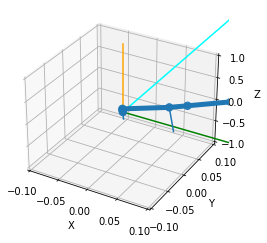

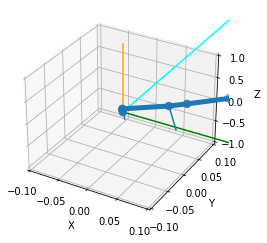

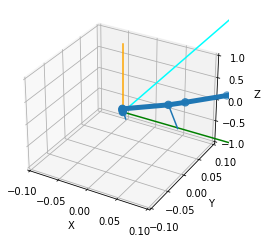

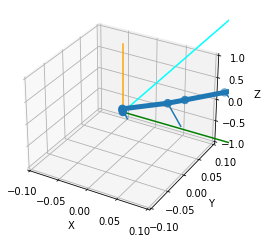

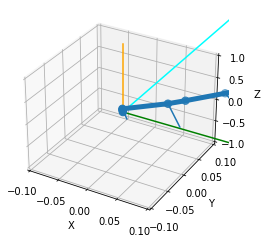

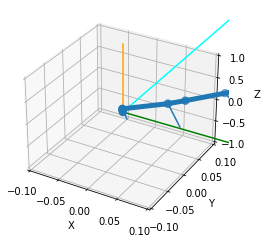

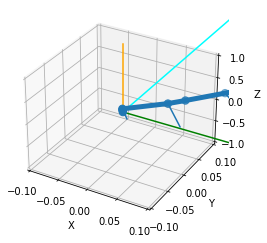

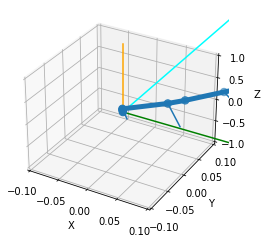

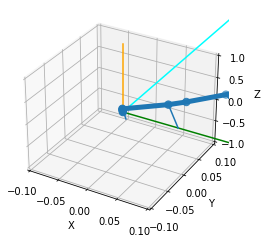

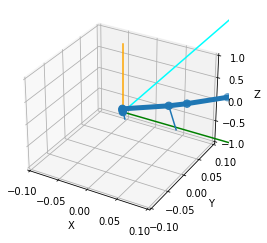

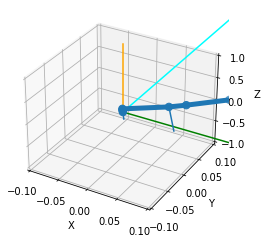

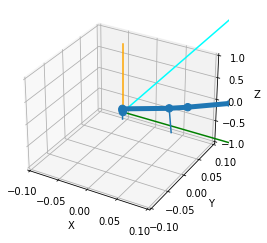

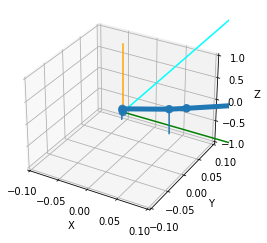

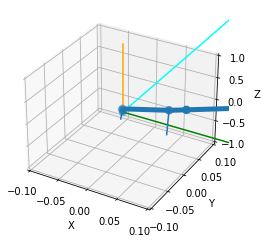

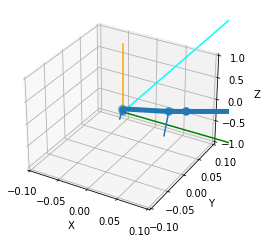

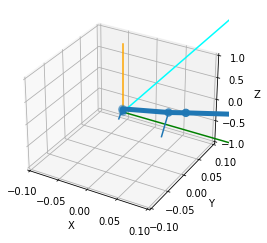

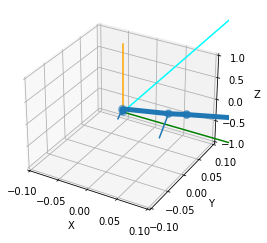

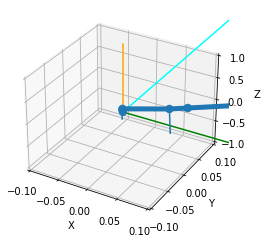

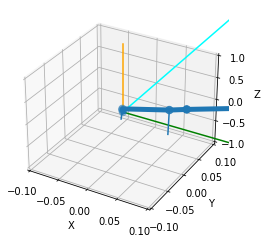

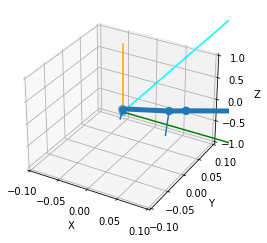

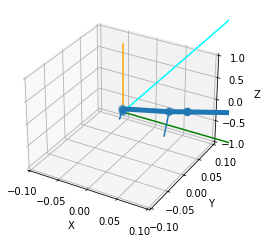

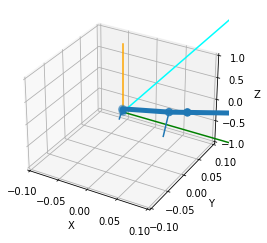

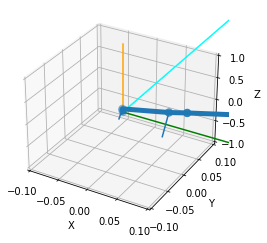

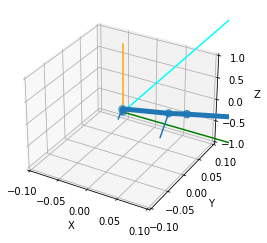

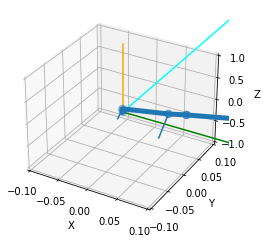

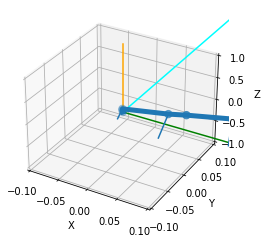

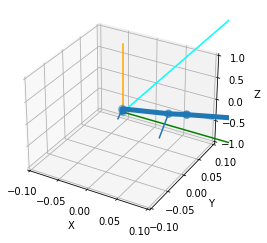

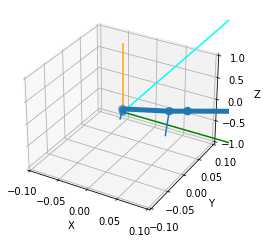

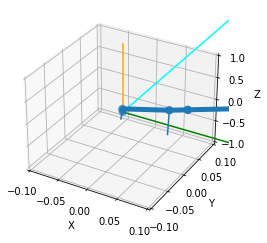

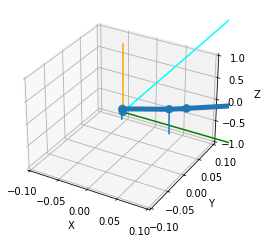

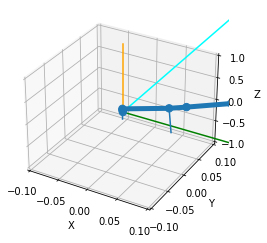

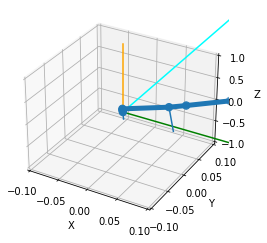

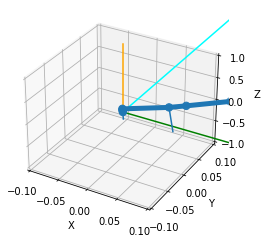

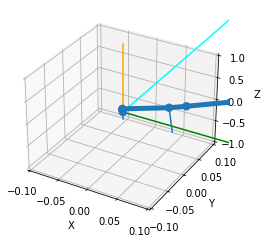

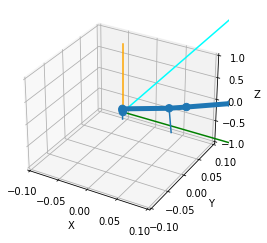

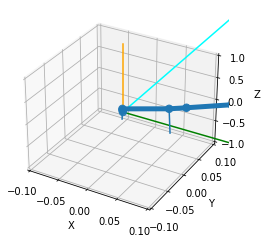

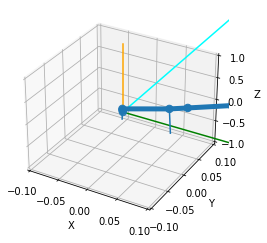

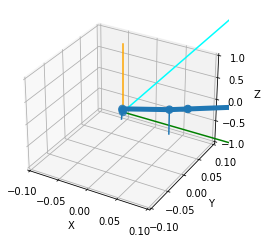

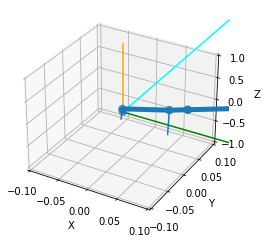

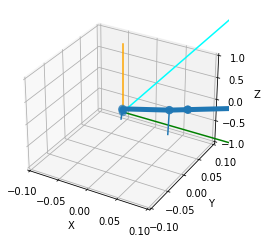

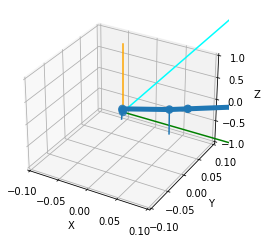

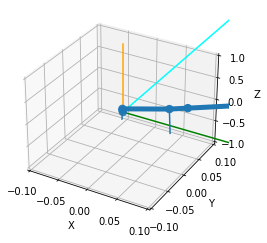

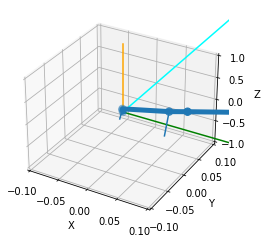

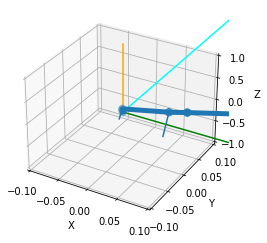

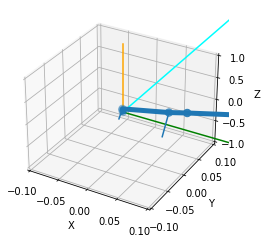

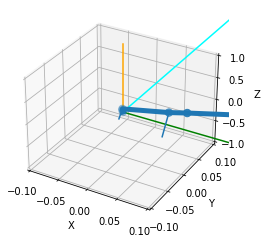

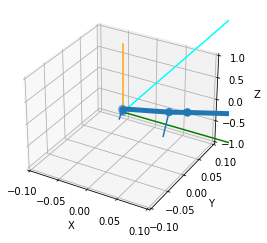

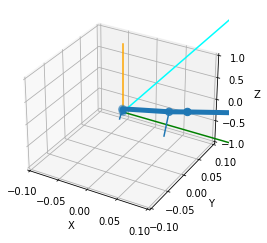

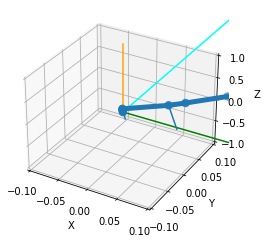

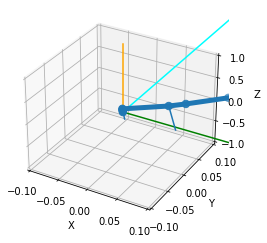

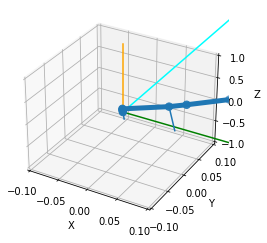

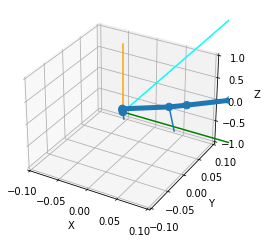

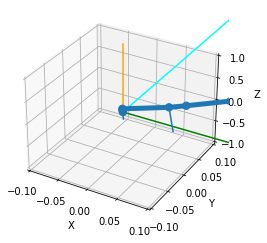

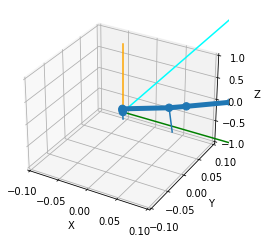

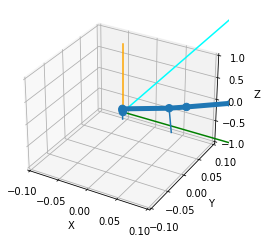

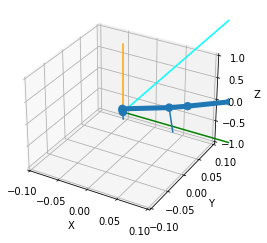

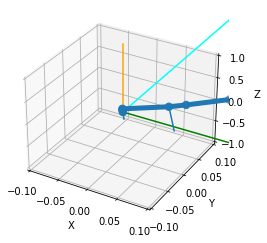

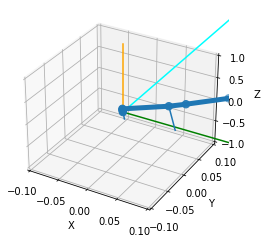

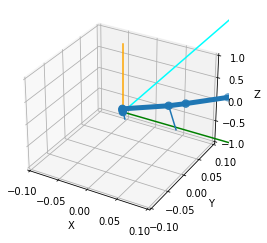

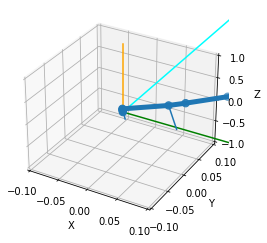

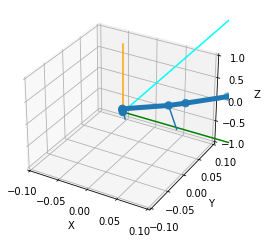

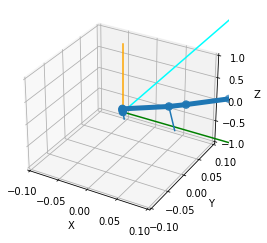

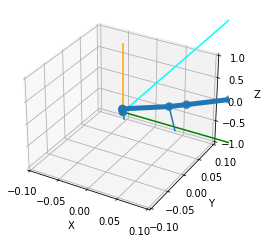

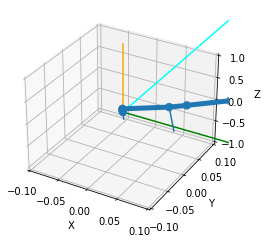

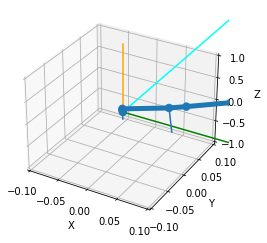

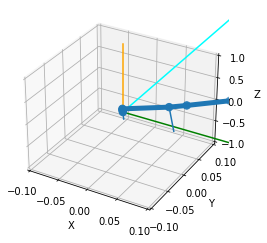

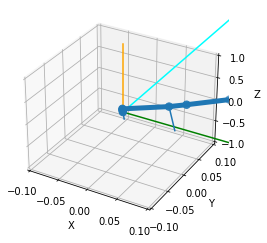

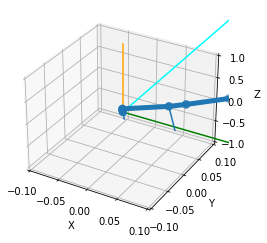

In [44]:
%matplotlib inline
import matplotlib.pyplot as plt

for i in range(len(target_position)):
    fig, ax = plot_utils.init_3d_figure()
    my_chain.plot(my_chain.inverse_kinematics(target_position[i]), ax, target=target_position[i])
    plt.xlim(-0.1, 0.1)
    plt.ylim(-0.1, 0.1)

In [ ]:
# import cv2
# import datetime
# now = datetime.datetime.now()
# strtime = str(now)
# face_cascade = cv2.CascadeClassifier("/home/sachin269/Desktop/INV_KINEMATICS/haarcascade_frontalface_default.xml")
# cap = cv2.VideoCapture(0)
# i = 0
# if int(cap.get(cv2.CAP_PROP_POS_FRAMES)) % 10 == 0:
#     _, img = cap.read()
#     gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#     faces = face_cascade.detectMultiScale(gray, 1.1, 4)
#     for (x, y, w, h) in faces:
#         cv2.rectangle(img, (x, y ), (x+w, y+h), (255, 0, 0), 2)
# #     cv2.imshow('image', img)
#         cv2.imwrite('1/frames/%sf%s.jpg'%(now, str(cap.get(cv2.CAP_PROP_POS_FRAMES))), img)
#     k = cv2.waitKey(1000) & 0xFF
# #     if k==27:
# #         break
# cap.release()